In [1]:
#pip install xgboost

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import preprocessing

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hitters.csv")

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


# Without Preprocessing

In [5]:
df.shape

(322, 20)

In [6]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


In [7]:
df.drop(["League","Division","NewLeague"],axis=1,inplace=True)

In [8]:
df.isnull().sum()

AtBat       0
Hits        0
HmRun       0
Runs        0
RBI         0
Walks       0
Years       0
CAtBat      0
CHits       0
CHmRun      0
CRuns       0
CRBI        0
CWalks      0
PutOuts     0
Assists     0
Errors      0
Salary     59
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64

In [11]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [12]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [13]:
models = []

models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RandomForests', RandomForestRegressor()))
models.append(('GradientBoosting', GradientBoostingRegressor()))
models.append(('XGBoost', XGBRegressor()))
models.append(('Light GBM', LGBMRegressor()))

In [14]:
X = df.drop("Salary",axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

for name,model in models:
    mod = model.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(name,rmse)
    print("-------------")

KNN 404.7724696402799
-------------
SVR 423.78981162543784
-------------
CART 488.44974348737946
-------------
RandomForests 306.47772749032373
-------------
GradientBoosting 303.38281918136846
-------------
XGBoost 297.42613210863027
-------------
Light GBM 351.67191671024233
-------------


# With Preprocessing

In [15]:
df = pd.read_csv("Hitters.csv")

In [16]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


## Feature Engineering

Creating new features

In [17]:
df["OrtCAtBat"] = df["CAtBat"] / df["Years"]
df["OrtCHits"] = df["CHits"] / df["Years"]
df["OrtCHmRun"] = df["CHmRun"] / df["Years"]
df["OrtCruns"] = df["CRuns"] / df["Years"]
df["OrtCRBI"] = df["CRBI"] / df["Years"]
df["OrtCWalks"] = cwalks = df["CWalks"] / df["Years"]


In [18]:
df['Year_lab'] = pd.qcut(df['Years'], 6 ,labels = [1,2,3,4,5,6]) #creating segments for years

In [19]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Errors,Salary,NewLeague,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks,Year_lab
0,293,66,1,30,29,14,1,293,66,1,...,20,NaN,A,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000,1
1,315,81,7,24,38,39,14,3449,835,69,...,10,475.0,N,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,6
2,479,130,18,66,72,76,3,1624,457,63,...,14,480.0,A,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667,1
3,496,141,20,65,78,37,11,5628,1575,225,...,3,500.0,N,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,5
4,321,87,10,39,42,30,2,396,101,12,...,4,91.5,N,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000,1


In [20]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
OrtCAtBat     0
OrtCHits      0
OrtCHmRun     0
OrtCruns      0
OrtCRBI       0
OrtCWalks     0
Year_lab      0
dtype: int64

In [21]:
df = pd.get_dummies(df,drop_first=True) #one hot encoding

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 4)
df_filled = imputer.fit_transform(df)

In [22]:
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors = 4) 
df_filled = imputer.fit_transform(df)

In [23]:
df = pd.DataFrame(df_filled,columns = df.columns)

In [24]:
df.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
OrtCAtBat      0
OrtCHits       0
OrtCHmRun      0
OrtCruns       0
OrtCRBI        0
OrtCWalks      0
League_N       0
Division_W     0
NewLeague_N    0
Year_lab_2     0
Year_lab_3     0
Year_lab_4     0
Year_lab_5     0
Year_lab_6     0
dtype: int64

In [25]:
import seaborn as sns
sns.boxplot(x = df["Salary"]);

In [26]:
df[["Salary"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,322.0,524.174908,431.587153,67.5,190.25,424.16675,737.5,2460.0


In [27]:
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

AtBat no
Hits no
HmRun yes
2
Runs yes
1
RBI yes
1
Walks yes
1
Years yes
2
CAtBat yes
5
CHits yes
6
CHmRun yes
32
CRuns yes
5
CRBI yes
26
CWalks yes
20
PutOuts yes
36
Assists yes
23
Errors yes
9
Salary yes
12
OrtCAtBat no
OrtCHits no
OrtCHmRun yes
6
OrtCruns no
OrtCRBI no
OrtCWalks yes
4
League_N no
Division_W no
NewLeague_N no
Year_lab_2 yes
36
Year_lab_3 yes
60
Year_lab_4 yes
52
Year_lab_5 yes
50
Year_lab_6 yes
48


In [28]:
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Salary"] > upper,"Salary"] = upper

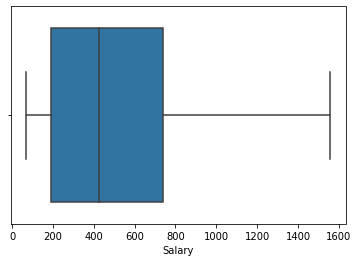

In [29]:
sns.boxplot(x = df["Salary"]);

In [30]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [31]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-4.25783219, -3.78799711, -2.70039387, -2.69858065, -2.50882318,
       -2.50185649, -2.44734183, -2.33798975, -2.27105393, -1.92571818,
       -1.68514164, -1.58047082, -1.56425713, -1.55523406, -1.5397351 ,
       -1.477142  , -1.44759247, -1.42102383, -1.41713523, -1.40005932,
       -1.39002534, -1.38264295, -1.37493975, -1.36663753, -1.3456977 ,
       -1.32325335, -1.3051363 , -1.30034408, -1.28167813, -1.28103151])

In [32]:
threshold = np.sort(df_scores)[7]
threshold

-2.3379897528497553

In [33]:
outlier = df_scores > threshold
df = df[outlier]

In [34]:
df.shape

(314, 31)

In [35]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,OrtCRBI,OrtCWalks,League_N,Division_W,NewLeague_N,Year_lab_2,Year_lab_3,Year_lab_4,Year_lab_5,Year_lab_6
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,...,29.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,...,29.571429,26.785714,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,...,88.666667,87.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,...,76.181818,32.181818,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,...,23.000000,16.500000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 321
Data columns (total 31 columns):
AtBat          314 non-null float64
Hits           314 non-null float64
HmRun          314 non-null float64
Runs           314 non-null float64
RBI            314 non-null float64
Walks          314 non-null float64
Years          314 non-null float64
CAtBat         314 non-null float64
CHits          314 non-null float64
CHmRun         314 non-null float64
CRuns          314 non-null float64
CRBI           314 non-null float64
CWalks         314 non-null float64
PutOuts        314 non-null float64
Assists        314 non-null float64
Errors         314 non-null float64
Salary         314 non-null float64
OrtCAtBat      314 non-null float64
OrtCHits       314 non-null float64
OrtCHmRun      314 non-null float64
OrtCruns       314 non-null float64
OrtCRBI        314 non-null float64
OrtCWalks      314 non-null float64
League_N       314 non-null float64
Division_W     314 non-null flo

In [37]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,OrtCRBI,OrtCWalks,League_N,Division_W,NewLeague_N,Year_lab_2,Year_lab_3,Year_lab_4,Year_lab_5,Year_lab_6
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,...,29.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,...,29.571429,26.785714,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,...,88.666667,87.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,...,76.181818,32.181818,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,...,23.000000,16.500000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
OrtCAtBat      0
OrtCHits       0
OrtCHmRun      0
OrtCruns       0
OrtCRBI        0
OrtCWalks      0
League_N       0
Division_W     0
NewLeague_N    0
Year_lab_2     0
Year_lab_3     0
Year_lab_4     0
Year_lab_5     0
Year_lab_6     0
dtype: int64

In [39]:
X = df.drop("Salary",axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

for name,model in models:
    mod = model.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(name,rmse)
    print("-------------")

KNN 256.9296791364955
-------------
SVR 393.2608516128628
-------------
CART 299.41861762796754
-------------
RandomForests 222.8956595214041
-------------
GradientBoosting 201.71418847812785
-------------
XGBoost 225.71660285285373
-------------
Light GBM 221.8228090156664
-------------
